# Nonlinear Systems: Study of the Nonlinear Pendulum
*Master's in Automation and Robotics - ETSII (UPM)*\
**Course:** 2023-24 \
**Student:** Josep María Barberá Civera \
**Student ID:** 17048\
**Date:** September 27

## Table of Contents
**1.2** Problem Description and Equations \
**1.3** Code and Plotting \
**1.4** 3D Visualizations with VPython \
**1.5** Linearization and Errors

## Problem description and equations

Consider a pendulum with length $l$ and mass $m$.

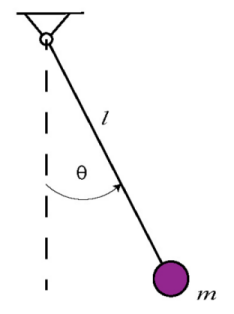

In [32]:
from IPython.display import Image,display
display(Image("pendulum.jpg"))

In terms of the angle measuring its displacement from the vertical, Newton's equations imply the dynamic equation:

$$l\ddot{\theta}+g\sin\theta=0;\quad\frac{\text{d}^2\theta}{\text{d}t^2}=-\frac{g}{l}\sin\theta.$$

If we also consider the effects of friction, which can be modeled as:

$$f_r=-b l \dot{\theta}$$

that is, proportional to angular velocity and opposing motion, the differential equation becomes:

$$\ddot{\theta}+\frac{b}{m}\dot{\theta}+\frac{g}{l}\sin\theta=0;\quad\frac{\text{d}^2\theta}{\text{d}t^2}=-\frac{b}{m}\frac{\text{d}\theta}{\text{d} t}-\frac{g}{l}\sin\theta$$

Below, we represent the motion of the damped nonlinear pendulum for 10 periods, with $l=1$ m, $b=2$ $\text{s}^{-1}$, $m=1$ kg, starting from rest with an initial angle of $\theta=90^\circ$, using the fourth-order Runge-Kutta method. To use this method, it's necessary to express our second-order differential equation as a system of first-order equations, as shown in the following code.


## Code and Plotting

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def damped_pendulum(l, m, b, theta_init):
    # Define the constants of the problem
    g = 9.81  # m/s^2
    #l = 1     # m
    #m = 1     # Kg
    #b = 0.25     # s^{-1}

    # Express the differential equation as a system of first-order equations:
    # r is an array containing the function in r[0] and its derivative in r[1]
    def F(r):
        return np.array([r[1], -(b/m)*r[1]-g/l*np.sin(r[0])])

    # Define the start and end of the simulation, as well as the number of points to study
    init, end, N = 0.0, 40, 4000
    # Create a time vector
    t = np.linspace(init, end, N)
    # Create the integration step
    h = (end - init) / N

    xp, yp = [], []
    # Set the initial conditions
    r0 = np.array([theta_init*np.pi/180, 0], float)

    for i in t:
        xp.append(r0[0])
        yp.append(r0[1])
        k1 = h * F(r0)
        k2 = h * F(r0 + k1/2)
        k3 = h * F(r0 + k2/2)
        k4 = h * F(r0 + k3)
        r0 += (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return xp, yp, t, r0



def plot_grid(xp,yp,t,l):
    # Create a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Plot the data and add labels
    axs[0, 0].plot(t, xp)
    axs[0, 0].set_title('Angle vs. Time')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Angle (radians)')

    axs[0, 1].plot(t, yp)
    axs[0, 1].set_title('Angular Velocity vs. Time')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Angular Velocity (rad/s)')

    axs[1, 0].plot(l * np.sin(xp), -l * np.cos(xp))
    axs[1, 0].set_title('Pendulum Path')
    axs[1, 0].set_xlabel('Horizontal Displacement (m)')
    axs[1, 0].set_ylabel('Vertical Displacement (m)')

    axs[1, 1].plot(xp, yp)
    axs[1, 1].set_title('Phase Space')
    axs[1, 1].set_xlabel('Angle (radians)')
    axs[1, 1].set_ylabel('Angular Velocity (rad/s)')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the combined figure
    plt.show()

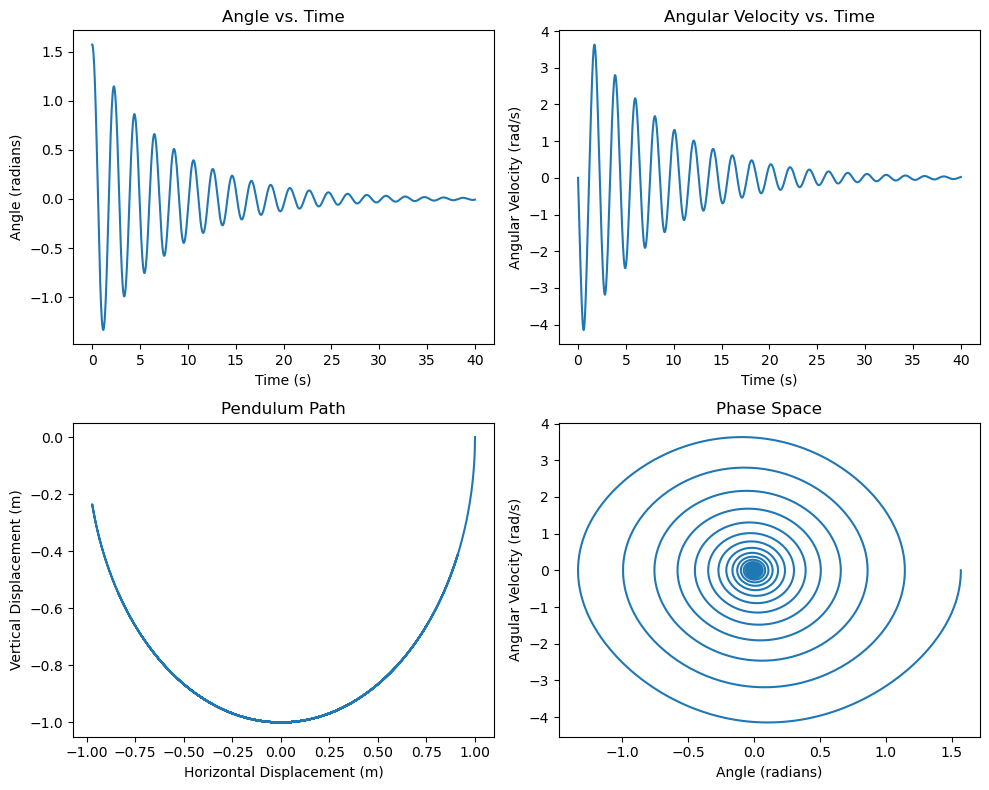

In [34]:
xp,yp,t,r0 = damped_pendulum(1,1,0.25,90)
plot_grid(xp,yp,t,1)

## 3D visualization of results using VPython

In [35]:
from vpython import sphere,canvas,vector,rate,cylinder
from numpy import arange,cos,sin,pi

# Create a 3D scene with specified dimensions and centered at the origin
scene=canvas(width=400, height=400,center=vector(0,0,0))

# Create a 3D sphere representing the pendulum bob
s=sphere(pos=vector(r0[0],r0[1],0),radius=0.1)

# Create a 3D cylinder representing the pendulum rod
rod = cylinder(pos=vector(0,0,0),axis=vector(1,0,0), radius=0.02)

# Iterate through angles in 'xp' representing the pendulum's motion
for theta in xp:
    # Control the animation speed (70 updates per second)
    rate(75)
    # Update the position of the sphere and the cylinder
    s.pos=vector(sin(theta),-cos(theta),0)
    rod.axis=vector(sin(theta),-cos(theta),0)

<IPython.core.display.Javascript object>

## Linearization and error

Now, if we linearize the system around the equilibrium point $\theta(0)=0$, the system becomes:
$$\ddot{\theta}+\frac{b}{m}\dot{\theta}+\frac{g}{l}\theta=0$$
since $\theta(0)=0;\, \dot{\theta}(0)=0;\,\ddot{\theta}(0)=0$.

Returning to visualize the system but linearized, we see how for small values of $\theta$, the behavior of the pendulum is very similar.

In [36]:
from numpy import linspace,sin,zeros,shape,ones,array, pi,cos
from matplotlib.pyplot import plot, show

def linear_damped_pendulum(l, m, b, theta_init):
    # Define the constants of the problem
    g = 9.81  # m/s^2
    
    # Express the differential equation as a system of first-order equations:
    # r is an array containing the function in r[0] and its derivative in r[1]
    def F(r):
        return np.array([r[1], -(b/m)*r[1]-g/l*r[0]])

    # Define the start and end of the simulation, as well as the number of points to study
    init, end, N = 0.0, 40, 4000
    # Create a time vector
    t = np.linspace(init, end, N)
    # Create the integration step
    h = (end - init) / N

    xp, yp = [], []
    # Set the initial conditions
    r0 = np.array([theta_init*np.pi/180, 0], float)

    for i in t:
        xp.append(r0[0])
        yp.append(r0[1])
        k1 = h * F(r0)
        k2 = h * F(r0 + k1/2)
        k3 = h * F(r0 + k2/2)
        k4 = h * F(r0 + k3)
        r0 += (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return xp, yp

def compare_grid(xp1, yp1, xp2, yp2, l):
    # Create a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Plot the data and add labels with legends
    axs[0, 0].plot(t, xp1, label='Nonlinear')
    axs[0, 0].plot(t, xp2, label='Linearized')
    axs[0, 0].set_title('Angle vs. Time')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Angle (radians)')
    axs[0, 0].legend()

    axs[0, 1].plot(t, yp1, label='Nonlinear')
    axs[0, 1].plot(t, yp2, label='Linearized')
    axs[0, 1].set_title('Angular Velocity vs. Time')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Angular Velocity (rad/s)')
    axs[0, 1].legend()

    axs[1, 0].plot(l * np.sin(xp1), -l * np.cos(xp1), label='Nonlinear')
    axs[1, 0].plot(l * np.sin(xp2), -l * np.cos(xp2), label='Linearized')
    axs[1, 0].set_title('Pendulum Path')
    axs[1, 0].set_xlabel('Horizontal Displacement (m)')
    axs[1, 0].set_ylabel('Vertical Displacement (m)')
    axs[1, 0].legend()

    axs[1, 1].plot(xp1, yp1, label='Nonlinear')
    axs[1, 1].plot(xp2, yp2, label='Linearized')
    axs[1, 1].set_title('Phase Space')
    axs[1, 1].set_xlabel('Angle (radians)')
    axs[1, 1].set_ylabel('Angular Velocity (rad/s)')
    axs[1, 1].legend()

    # Adjust spacing between subplots
    plt.tight_layout()
    # Show the combined figure
    plt.show()


Since it is not possible to appreciate the difference separately, we will compare with the non-linearized simulation by drawing both graphs on top of each other.

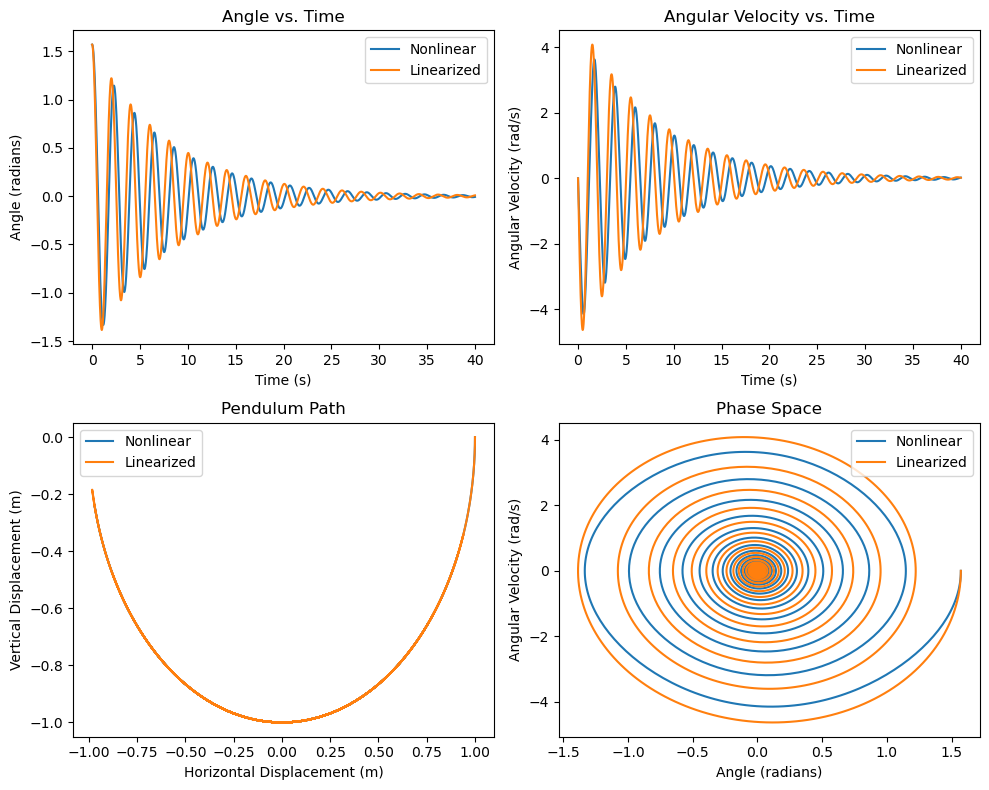

In [37]:
xp1, yp1,t,r0 = damped_pendulum(1,1,0.25,90)
xp2, yp2 = linear_damped_pendulum(1,1,0.25,90)
compare_grid(xp1,yp1,xp2,yp2,1)

We see that errors appear. However, if we study and compare both systems for an equilibrium point environment, the results are identical. Here we are going to use $\theta_0=30^\circ$ as the initial value.

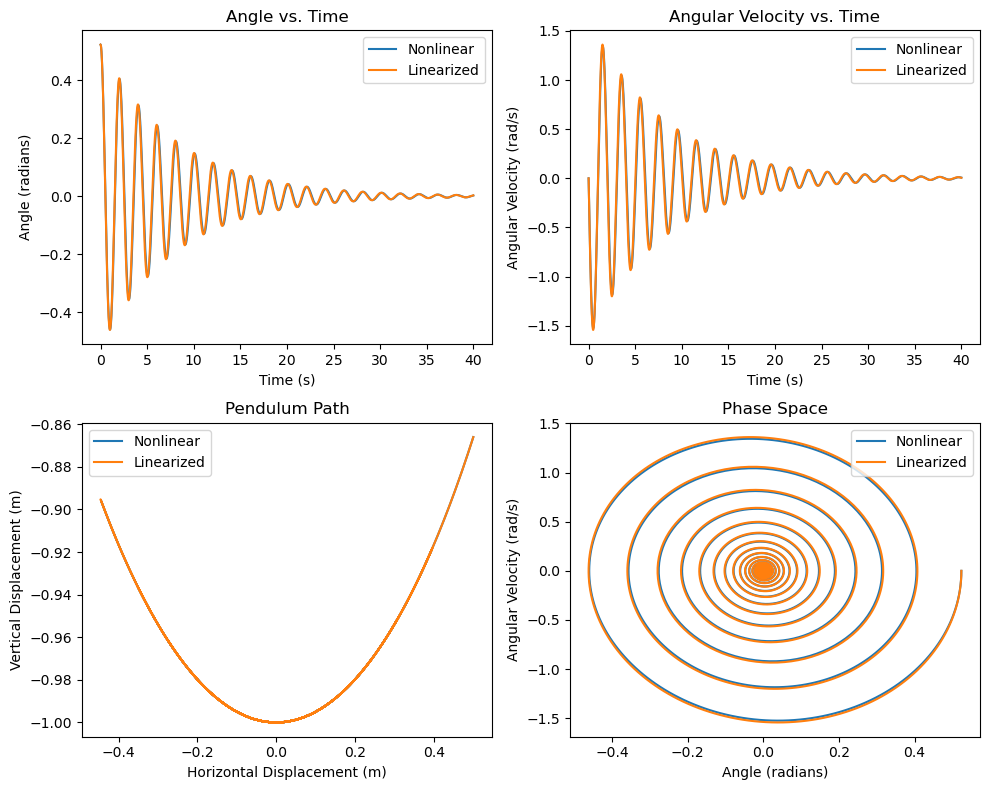

In [38]:
xp1, yp1,t,r0 = damped_pendulum(1,1,0.25,30)
xp2, yp2 = linear_damped_pendulum(1,1,0.25,30)
compare_grid(xp1,yp1,xp2,yp2,1)

But if we use a really large $theta$ we can appreciate how the error becomes huge outside the break-even point environment.

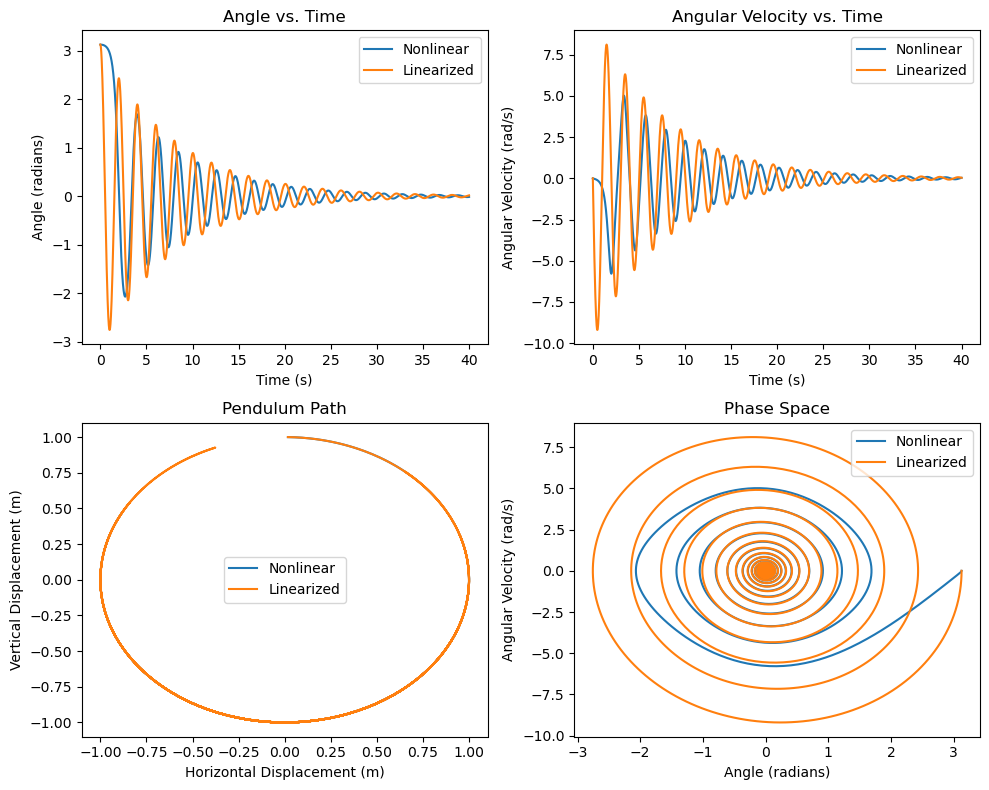

In [39]:
xp1, yp1,t,r0 = damped_pendulum(1,1,0.25,179)
xp2, yp2 = linear_damped_pendulum(1,1,0.25,179)
compare_grid(xp1,yp1,xp2,yp2,1)